## Data cleaning and feature engineering

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("clean_csv", index_col=0)
df.head()

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,PAPERLESSBILLING,MONTHLYCHARGES,TOTALCHARGES,MONTHLY_MINUTES_OF_USE,...,STREAMINGMOVIES_No,STREAMINGMOVIES_No internet service,STREAMINGMOVIES_Yes,CONTRACT_Month-to-month,CONTRACT_One year,CONTRACT_Two year,PAYMENTMETHOD_Bank transfer automatic,PAYMENTMETHOD_Credit card automatic,PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
2,0,0,0,0,10,0,0,29.75,301.90,0,...,1,0,0,1,0,0,0,0,0,1
3,1,1,0,0,1,0,1,39.65,39.65,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,1,1,1,0,0,30.20,30.20,0,...,1,0,0,1,0,0,0,0,1,0


In [3]:
#df.isnull().sum()

In [4]:
#df.info()

In [5]:
#Prepare target & features for modeling
cols = df.columns
train_cols = cols.drop(["CHURN"])
features = df[train_cols]
target = df["CHURN"]
train_cols

Index(['GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE',
       'PHONESERVICE', 'PAPERLESSBILLING', 'MONTHLYCHARGES', 'TOTALCHARGES',
       'MONTHLY_MINUTES_OF_USE', 'TOTAL_MINUTES_OF_USE', 'MONTHLY_SMS',
       'TOTAL_SMS', 'MULTIPLELINES_No', 'MULTIPLELINES_No phone service',
       'MULTIPLELINES_Yes', 'INTERNETSERVICE_DSL',
       'INTERNETSERVICE_Fiber optic', 'INTERNETSERVICE_No',
       'ONLINESECURITY_No', 'ONLINESECURITY_No internet service',
       'ONLINESECURITY_Yes', 'ONLINEBACKUP_No',
       'ONLINEBACKUP_No internet service', 'ONLINEBACKUP_Yes',
       'DEVICEPROTECTION_No', 'DEVICEPROTECTION_No internet service',
       'DEVICEPROTECTION_Yes', 'TECHSUPPORT_No',
       'TECHSUPPORT_No internet service', 'TECHSUPPORT_Yes', 'STREAMINGTV_No',
       'STREAMINGTV_No internet service', 'STREAMINGTV_Yes',
       'STREAMINGMOVIES_No', 'STREAMINGMOVIES_No internet service',
       'STREAMINGMOVIES_Yes', 'CONTRACT_Month-to-month', 'CONTRACT_One year',
       'CONTRAC

## Clustering (Kmeans)

In [6]:
# Create a kmeans model using k = 3
# YOUR CODE HERE
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [8]:
#df.drop(['age'], axis = 1, inplace = True)
x_data = df.as_matrix()
x_data

array([[ 0.,  0.,  1., ...,  0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  1., ...,  1.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [9]:
# Fit the model to the data
# YOUR CODE HERE
kmeans.fit(x_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
# YOUR CODE HERE
predicted_clusters=kmeans.predict(x_data)

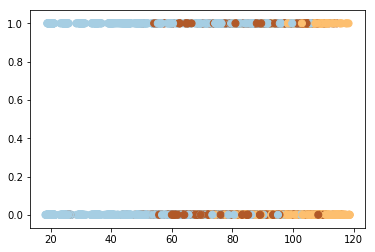

In [11]:
# Plot the clusters
plt.scatter(x_data[:, 7], x_data[:, 13], c=predicted_clusters, s=50, cmap='Paired')

In [12]:
# Bonus
# Print the cluster centers and cluster labls
# YOUR CODE HERE
centers=kmeans.cluster_centers_ 
labels=kmeans.labels_

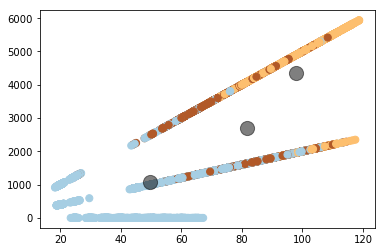

In [13]:
# Plot the data using the cluster centers and cluster labls
plt.scatter(x_data[:, 7], x_data[:, 9], c=labels, s=50, cmap='Paired')
plt.scatter(centers[:, 7], centers[:, 9], c='black', s=200, alpha=0.5)